<a href="https://colab.research.google.com/github/kinn10/K-means/blob/main/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow-gpu==2.0.rc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.rc (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.rc


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
pwd

'/content/drive/MyDrive/ML'

In [ ]:
link="https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ce92a66145d5d05022a2d13ed097bbfc7be0252025adc4453471e98f7b89263a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (3).zip'

In [ ]:
data="./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link=data + "train.p"
valid_link=data + "valid.p"
test_link=data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link,mode="rb") as f:
  train=pickle.load(f)
with open(valid_link,mode="rb") as f:
  valid=pickle.load(f)
with open(test_link,mode="rb") as f:
  test=pickle.load(f)

In [ ]:
trainX=train['features']
trainY=train['labels']
testX=test['features']
testY=test['labels']
validX=valid['features']
validY=valid['labels']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

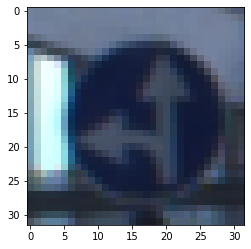

In [ ]:
plt.imshow(trainX[5000])

In [ ]:
trainY[5000]

37

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[0]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX,trainY=shuffle(trainX,trainY)

In [ ]:
trainX=trainX.astype("float")/255
validX=validX.astype("float")/255
testX=testX.astype("float")/255

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY=lb.fit_transform(trainY)

In [ ]:
validY=lb.fit_transform(validY)

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,AveragePooling2D,MaxPool2D,Conv2D,Activation,Dropout,Flatten,Input,Dense,concatenate,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [ ]:
model=Sequential()

In [ ]:
width = 32
height=32
classes=43

In [ ]:
shape=(width,height,3)

In [ ]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
aug=ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [ ]:
learning_rate=0.01

In [ ]:
epochs=10
#epoch
#steps
batch_size=64

In [ ]:
opt=SGD(learning_rate=learning_rate,momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
H=model.fit(aug.flow(trainX,trainY,batch_size=batch_size), batch_size = batch_size,validation_data = (validX,validY),steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs)

Epoch 1/10
543/543 [==============================] - 34s 34ms/step - loss: 1.8986 - accuracy: 0.4464 - val_loss: 1.7933 - val_accuracy: 0.5245
Epoch 2/10
543/543 [==============================] - 18s 33ms/step - loss: 0.6987 - accuracy: 0.7694 - val_loss: 1.2765 - val_accuracy: 0.6542
Epoch 3/10
543/543 [==============================] - 18s 32ms/step - loss: 0.3412 - accuracy: 0.8882 - val_loss: 0.7832 - val_accuracy: 0.7850
Epoch 4/10
543/543 [==============================] - 18s 32ms/step - loss: 0.2028 - accuracy: 0.9344 - val_loss: 0.5524 - val_accuracy: 0.8492
Epoch 5/10
543/543 [==============================] - 18s 32ms/step - loss: 0.1400 - accuracy: 0.9560 - val_loss: 0.6521 - val_accuracy: 0.8327
Epoch 6/10
543/543 [==============================] - 18s 33ms/step - loss: 0.1114 - accuracy: 0.9640 - val_loss: 0.6878 - val_accuracy: 0.8243
Epoch 7/10
543/543 [==============================] - 18s 33ms/step - loss: 0.0910 - accuracy: 0.9712 - val_loss: 0.6568 - val_accuracy:

In [ ]:
save_model=tf.keras.models.load_model("trung.h5")

In [ ]:
result=save_model.predict(testX[99:100])

In [ ]:
result

array([[1.9808359e-10, 1.3823244e-06, 3.6009617e-08, 2.6650410e-08,
        1.5183620e-11, 1.3731639e-06, 1.3043754e-07, 4.3059170e-08,
        1.7662183e-08, 8.8629527e-11, 1.4808501e-09, 1.2635739e-07,
        1.5006378e-08, 2.6562150e-09, 1.8527714e-08, 4.6736993e-08,
        2.0979911e-09, 3.8756928e-10, 2.3506772e-10, 1.3514183e-10,
        8.1466722e-11, 2.8229832e-09, 1.2486486e-08, 3.1872188e-10,
        2.0519646e-09, 4.6513842e-09, 1.3972988e-10, 1.9351107e-08,
        4.2210365e-07, 6.4578072e-09, 1.0347257e-08, 1.1303509e-09,
        3.6572902e-09, 9.9792397e-01, 2.0190796e-03, 3.2894027e-06,
        4.8154667e-05, 5.6670297e-07, 2.0478440e-07, 1.4256078e-07,
        7.0781618e-07, 2.1991591e-08, 1.0562862e-07]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final=np.argmax(result)

In [ ]:
final=classNames[final]

In [ ]:
final

'Turn right ahead'

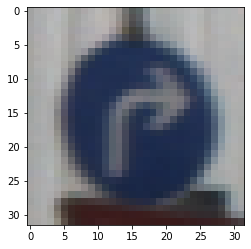

In [ ]:
plt.imshow(testX[99])